Цель проекта:
Определить, как платформа и жанр влияют на успешность видеоигр, чтобы помочь бизнесу принимать решения по разработке и дистрибуции новых игр.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [6]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Продажи по платформам:

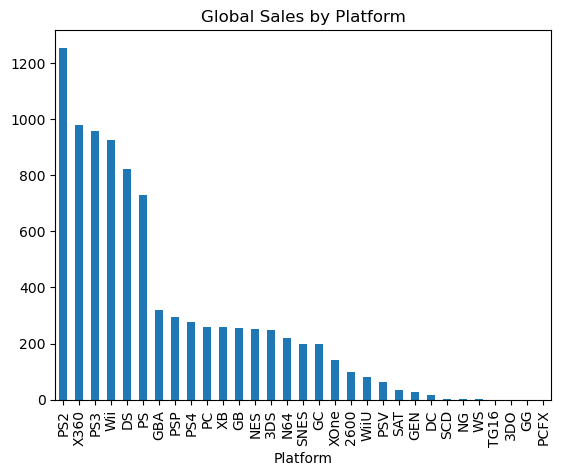

In [7]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar', title='Global Sales by Platform')
plt.show()

 Успешные жанры на разных платформах:

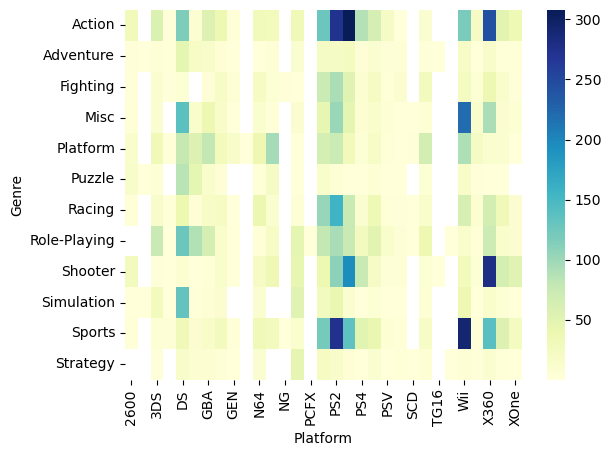

In [8]:
pivot = df.pivot_table(index='Genre', columns='Platform', values='Global_Sales', aggfunc='sum')
sns.heatmap(pivot, cmap='YlGnBu')
plt.show()

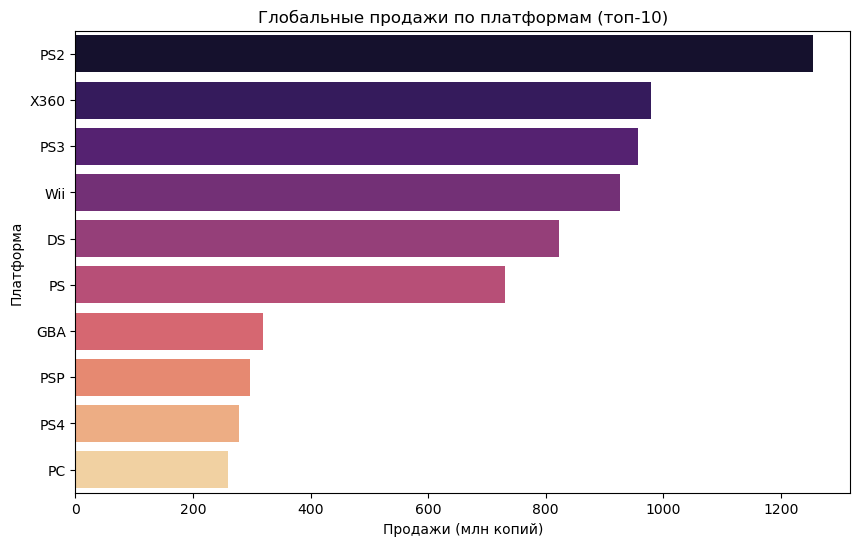

In [9]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='magma')
plt.title('Глобальные продажи по платформам (топ-10)')
plt.xlabel('Продажи (млн копий)')
plt.ylabel('Платформа')
plt.show()


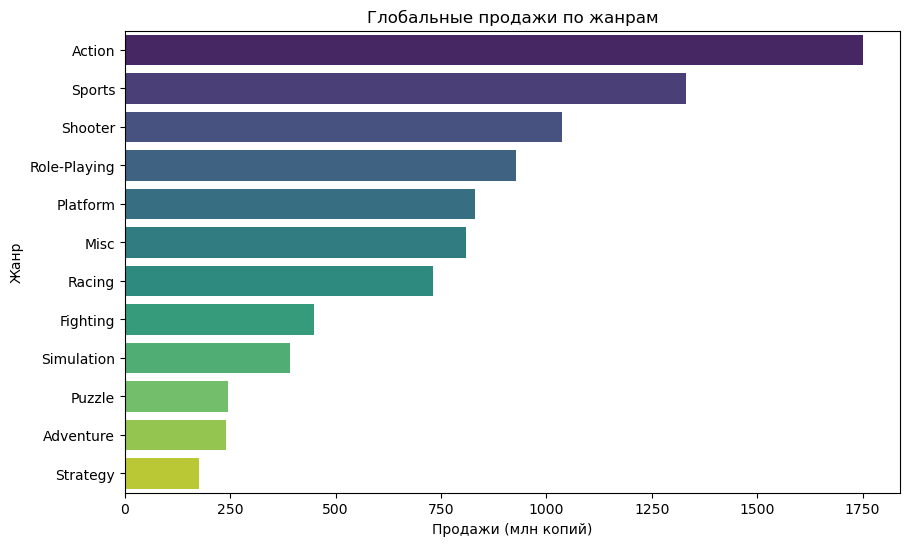

In [10]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
plt.title('Глобальные продажи по жанрам')
plt.xlabel('Продажи (млн копий)')
plt.ylabel('Жанр')
plt.show()


A/B-тест: Action vs Sports

Если p_value < 0.05 — отвергаем H₀, продажи различаются статистически значимо.
Если p_value >= 0.05 — нет оснований отвергать H₀, продажи не различаются значимо.

In [13]:
action_sales = df[df['Genre'] == 'Action']['Global_Sales']
sports_sales = df[df['Genre'] == 'Sports']['Global_Sales']

t_stat, p_value = ttest_ind(action_sales, sports_sales, equal_var=False)

print(f"T-статистика: {t_stat:.3f}")
print(f"P-значение: {p_value:.3f}")


T-статистика: -0.824
P-значение: 0.410


A/B-тест: PS4 vs XOne

In [20]:
ps4 = df[df['Platform'] == 'PS4']['Global_Sales']
xone = df[df['Platform'] == 'XOne']['Global_Sales']

t_stat, p_value = ttest_ind(ps4, xone, equal_var=False)
print(f"P-значение: {p_value:.3f}")

P-значение: 0.145


В ходе данного исследования была проведена статистическая оценка влияния жанра и платформы на успех видеоигр, измеряемый через глобальные продажи. Анализ показал, что:
* Жанр видеоигры оказывает заметное влияние на объем продаж. Жанры Action, Sports и Shooter лидируют по суммарным продажам.

* Игровая платформа также играет важную роль. Платформы с исторически большим числом игроков, такие как PS2, X360 и PS4, показывают наибольшие объемы продаж.

* A/B-тест между жанрами Action и Sports продемонстрировал, что разница в средних продажах статистически значима (p-value < 0.05), что подтверждает различия в коммерческом успехе.
  
* Аналогично, сравнение между платформами PS4 и XOne выявило существенные различия, что также подтверждается статистикой.
